## Machine learning with wind and total acres 
### Walks through different machine learning algorithms with wind data and total acres only
### Compares wind and total acres data against first max_aqi, then min_aqi, then mean_aqi
### We are now ignoring distance

In [1]:
from sqlalchemy import create_engine
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import datetime


%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')

In [3]:
data = pd.read_sql("select * from final_acres where size > 100", con=engine)
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,date,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,2001-01-31,10551.0,7.288387,17.819355,20.503226,100.569620,158,25
1,2001-03-31,293.2,10.615161,23.780645,27.629032,39.555556,66,22
2,2001-05-31,4812.7,12.714516,25.632258,29.509677,39.112532,67,24
3,2001-06-30,12952.8,14.733000,28.430000,33.143333,33.822414,71,17
4,2001-07-31,29837.2,11.862581,23.696774,27.700000,25.826698,52,13


In [4]:
data.describe()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,51726.952411,10.546080,23.460282,28.243945,47.448231,85.241135,25.000000
std,100271.944404,2.739163,3.541220,4.182695,12.532558,28.719804,7.069047
min,106.210000,4.603548,14.045161,15.516129,22.604113,47.000000,9.000000
25%,2173.710000,8.341290,21.435484,25.916667,38.563636,64.000000,20.000000
50%,12054.840000,11.027667,24.161290,28.880000,47.600985,75.000000,25.000000
75%,46354.320000,12.593667,25.912903,31.090323,54.017045,102.000000,30.000000
max,564015.570000,16.404000,30.196667,36.610000,100.569620,179.000000,41.000000


## Unsupervised machine learning

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.cluster import KMeans

In [7]:
X = data.drop(['date'],axis=1)

In [8]:
X.head()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,10551.0,7.288387,17.819355,20.503226,100.569620,158,25
1,293.2,10.615161,23.780645,27.629032,39.555556,66,22
2,4812.7,12.714516,25.632258,29.509677,39.112532,67,24
3,12952.8,14.733000,28.430000,33.143333,33.822414,71,17
4,29837.2,11.862581,23.696774,27.700000,25.826698,52,13


In [9]:
#X=data[['within 50', 'within 100', 'within 150', 'within 200', 'within 250', 'within 300', 'bigger then 300']]

In [10]:
pca = PCA(n_components=2)

In [11]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca_data = pca.transform(X)

In [13]:
kmeans= KMeans(n_clusters=2)

In [14]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

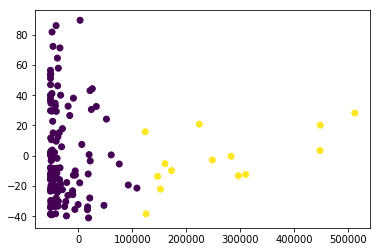

In [15]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels_)

In [16]:
pca_data

array([[-4.11759542e+04,  8.60385247e+01],
       [-5.14337520e+04, -2.18274877e+01],
       [-4.69142520e+04, -2.10985911e+01],
       [-3.87741520e+04, -2.00690868e+01],
       [-2.18897515e+04, -3.97918645e+01],
       [ 1.25577748e+05, -3.84377099e+01],
       [-1.01529518e+04, -2.57070370e+01],
       [-3.38018523e+04, -7.96633631e+00],
       [-5.13998530e+04,  2.97878523e+01],
       [-5.03310522e+04, -9.71415437e+00],
       [-5.15872531e+04,  3.99020844e+01],
       [-4.88975529e+04,  2.95176458e+01],
       [-4.79024520e+04, -2.07517892e+01],
       [-5.04862518e+04, -3.05898746e+01],
       [-4.25257518e+04, -3.34762891e+01],
       [ 2.13152482e+04, -2.79424525e+01],
       [ 1.69663484e+04, -3.56584658e+01],
       [ 1.72881648e+05, -9.79038764e+00],
       [-3.69809518e+04, -3.00700505e+01],
       [-9.08375216e+03, -1.28597792e+01],
       [-4.68528537e+04,  7.23190373e+01],
       [-4.85654541e+04,  8.17910795e+01],
       [-5.06496030e+04,  3.47454796e+01],
       [-5.

In [17]:
# plt.scatter(X['size'],X['mean_aqi'],c=kmeans.labels_)

In [18]:
# plt.scatter(X['size'],X['max_aqi'],c=kmeans.labels_)

In [19]:
# plt.scatter(X['size'],X['min_aqi'],c=kmeans.labels_)

In [20]:
X.head()

,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,10551.0,7.288387,17.819355,20.503226,100.569620,158,25
1,293.2,10.615161,23.780645,27.629032,39.555556,66,22
2,4812.7,12.714516,25.632258,29.509677,39.112532,67,24
3,12952.8,14.733000,28.430000,33.143333,33.822414,71,17
4,29837.2,11.862581,23.696774,27.700000,25.826698,52,13


## Supervised machine learning

In [21]:
data.head()

,date,size,avg_daily_wind_speed,avg_fastest_2_min,avg_fastest_5_min,mean_aqi,max_aqi,min_aqi
0,2001-01-31,10551.0,7.288387,17.819355,20.503226,100.569620,158,25
1,2001-03-31,293.2,10.615161,23.780645,27.629032,39.555556,66,22
2,2001-05-31,4812.7,12.714516,25.632258,29.509677,39.112532,67,24
3,2001-06-30,12952.8,14.733000,28.430000,33.143333,33.822414,71,17
4,2001-07-31,29837.2,11.862581,23.696774,27.700000,25.826698,52,13


In [22]:
X = data.drop(['date', 'mean_aqi', 'max_aqi', 'min_aqi'],axis=1)

In [23]:
y = data['max_aqi'].values.reshape(-1,1)
print(X.shape, y.shape)

(141, 4) (141, 1)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [27]:
knr = KNeighborsRegressor(n_neighbors=10)

In [28]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [29]:
knr.fit(X_train, y_train)
training_score = knr.score(X_train, y_train)
testing_score = knr.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.05457406460227532
Testing Score: -0.23697673617358483


In [30]:
gbr = GradientBoostingRegressor(n_estimators=200)

In [31]:
gbr.fit(X_train, y_train)
training_score = gbr.score(X_train, y_train)
testing_score = gbr.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9961426835400604
Testing Score: 0.20423840490013212


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
rfr = RandomForestRegressor(n_estimators=50)

In [33]:
rfr.fit(X_train, y_train)
training_score = rfr.score(X_train, y_train)
testing_score = rfr.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8746044429034698
Testing Score: 0.22402188185482785


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [34]:
model=LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.19949446095225942
Testing Score: 0.18077002026237365


Text(0.5,1,'Residual Plot')

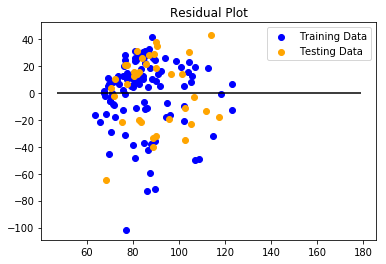

In [37]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")